# Compare Coarse-Grained and Refined Simulations

Evaluate the difference between the contact maps of a coarse-grained and a refined simulation.

### Import Modules

In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Specify Simulations

Use `inspect_simulations.ipynb` to find matching pairs of coarse-grained and refined simulations.

In [2]:
output_dir = "/scratch/users/jwakim/chromo_two_mark_phase_transition/output/full_factorial_batch_2"
sim_ind_cg = 9
sim_ind_refined = 33
sim_cmap_file_name = "log_contact_matrix.csv"

### Load Contact Maps

In [3]:
cmap_cg = pd.read_csv(
    f"{output_dir}/sim_{sim_ind_cg}/{sim_cmap_file_name}", header=None
).to_numpy()
cmap_refined = pd.read_csv(
    f"{output_dir}/sim_{sim_ind_refined}/{sim_cmap_file_name}", header=None
).to_numpy()

### Resize Refined Contact Map

In [4]:
cmap_refined_resized = skimage.transform.resize(
    cmap_refined, (cmap_cg.shape[0], cmap_cg.shape[1]), anti_aliasing=True
)

In [5]:
print(f"Shape of Coarse-Grained Contact Map: {cmap_cg.shape}")
print(f"Shape of Resized Refined Contact Map: {cmap_refined_resized.shape}")

Shape of Coarse-Grained Contact Map: (5243, 5243)
Shape of Resized Refined Contact Map: (5243, 5243)


### Plot the Coarse-Grained and Refined Contact Maps

Place the contact map corresponding to the coarse-grained simulation in the upper right side of the matrix. Place the contact map corresponding to the refined simulation in the lower left. Scale both contact maps so that the 99-percentile contact frequency is normalized to the value set by `max_scale`.

In [6]:
# Fixed reference for normalization
max_scale = 5
percentile = 99

# Coarse-grained contact map in the upper right
cmap_cg_upper = np.triu(cmap_cg)
cmap_cg_upper *= max_scale / np.percentile(cmap_cg_upper, 99)

# Erase the bottom left from the coarse-grained contact map
cmap_cg_plot = cmap_cg_upper.copy()
for i in range(len(cmap_cg_plot)):
    for j in range(i):
        cmap_cg_plot[i, j] = np.nan

# Refined contact map in the lower left
cmap_refined_lower = np.tril(cmap_refined_resized)
cmap_refined_lower *= max_scale / np.percentile(cmap_refined_lower, 99)

# Erase the top right from the refined contact map
cmap_refined_plot = cmap_refined_lower.copy()
for i in range(len(cmap_refined_plot)):
    for j in range(i):
        cmap_refined_plot[j, i] = np.nan

# Calculate the Pearson correlation between the refined and coarse-grained contact maps
correlation_coefficient = np.corrcoef(
    cmap_cg_plot[~np.isnan(cmap_cg_plot)].flat,
    cmap_refined_plot.T[~np.isnan(cmap_refined_plot.T)].flat
)[0, 1]

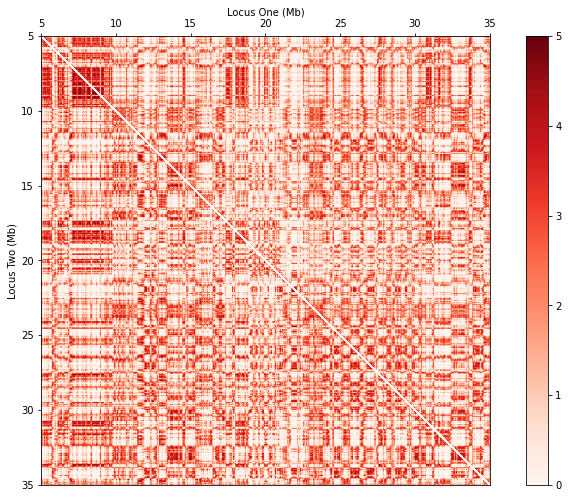

Correlation Coefficient: 0.724





In [7]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_cg_plot, cmap="Reds", extent=extents, vmin=0, vmax=max_scale)
im = ax.imshow(cmap_refined_plot, cmap="Reds", extent=extents, vmin=0, vmax=max_scale)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(max_scale+1)
boundaries = np.linspace(0, max_scale, 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {round(correlation_coefficient, 3)}")
print("\n\n")

### Check Work

Verify that I did not just plot the same matrices twice.

In [8]:
print("Contact Frequencies of Coarse-Grained Simulation: \n")
print(cmap_cg_plot)
print()
print("Contact Frequencies of Refined Simulation: \n")
print(cmap_refined_plot)

Contact Frequencies of Coarse-Grained Simulation: 

[[5.91963483 5.24462368 4.91275843 ... 2.79725692 2.79725692 0.57672019]
 [       nan 5.91963483 4.52924799 ... 2.57864696 2.57864696 0.57672019]
 [       nan        nan 5.91963483 ... 0.         0.         0.        ]
 ...
 [       nan        nan        nan ... 5.91963483 5.91963483 4.52924799]
 [       nan        nan        nan ...        nan 5.91963483 4.52924799]
 [       nan        nan        nan ...        nan        nan 5.91963483]]

Contact Frequencies of Refined Simulation: 

[[5.45150777        nan        nan ...        nan        nan        nan]
 [5.45150777 5.45150777        nan ...        nan        nan        nan]
 [5.1859738  5.1859738  5.11978023 ...        nan        nan        nan]
 ...
 [0.         0.         0.         ... 5.11978023        nan        nan]
 [0.         0.         0.         ... 4.35297084 5.1199825         nan]
 [0.         0.         0.         ... 3.24102846 5.03135303 5.29683643]]
